In [2]:
# Basic Libraries   
import os
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image


# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# TensorFlow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Data Extraction

image_dir = './resources/train'

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({'filename': filenames, 'label': labels})

data.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [4]:
# Train Test Split

labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, random_state=42, stratify=labels)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


In [5]:
## Data Preparation

img_size = 128
img_channel = 3
bat_size = 32

train_ds = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,
rotation_range = 15,
horizontal_flip = True,
zoom_range = 0.2,
shear_range = 0.1,
fill_mode = 'reflect',
width_shift_range = 0.1,
height_shift_range = 0.1)

test_ds = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# FOR LABELLED DATA

train_generator = train_ds.flow_from_dataframe(X_train,
                                                    directory = './resources/train',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (img_size,img_size)
                                                   )
val_generator = test_ds.flow_from_dataframe(X_val, 
                                                 directory = './resources/train',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (img_size,img_size),
                                                 shuffle=False
                                                )

test_generator = test_ds.flow_from_dataframe(X_test, 
                                                  directory = './resources/train',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (img_size,img_size),
                                                  shuffle=False
                                                 )

# FOR NONE LABELLED DATA

train_gen = train_ds.flow_from_directory('./resources/train', 
                                              class_mode='binary',
                                              target_size = (img_size,img_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_ds.flow_from_directory('./resources/test', 
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (img_size,img_size),
                                          shuffle = False
                                         )

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [6]:
## Define the CNN model
num_classes = 2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,img_channel)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cat_dog = model.fit(train_generator, validation_data = val_generator, epochs = 3)
model.save("cat_dog.h5")

C:\Users\mikke\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


C:\Users\mikke\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 286ms/step - accuracy: 0.5972 - loss: 0.6538 - val_accuracy: 0.7368 - val_loss: 0.5367
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 182s 289ms/step - accuracy: 0.7247 - loss: 0.5417 - val_accuracy: 0.7692 - val_loss: 0.4681
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 273ms/step - accuracy: 0.7542 - loss: 0.4981 - val_accuracy: 0.8240 - val_loss: 0.4043


In [7]:
# Prediction with labels

result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)
labels = ['cat','dog']
print(classification_report(y_true,y_pred,target_names=labels))


The accuracy of the model for testing data is: 81.40000104904175
The Loss of the model for testing data is: 0.399324506521225
              precision    recall  f1-score   support

         cat       0.83      0.80      0.81      1250
         dog       0.80      0.83      0.82      1250

    accuracy                           0.81      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.81      0.81      0.81      2500


In [ ]:
# Prediction without labels

result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)
labels = ['cat','dog']
print(classification_report(y_true,y_pred,target_names=labels))

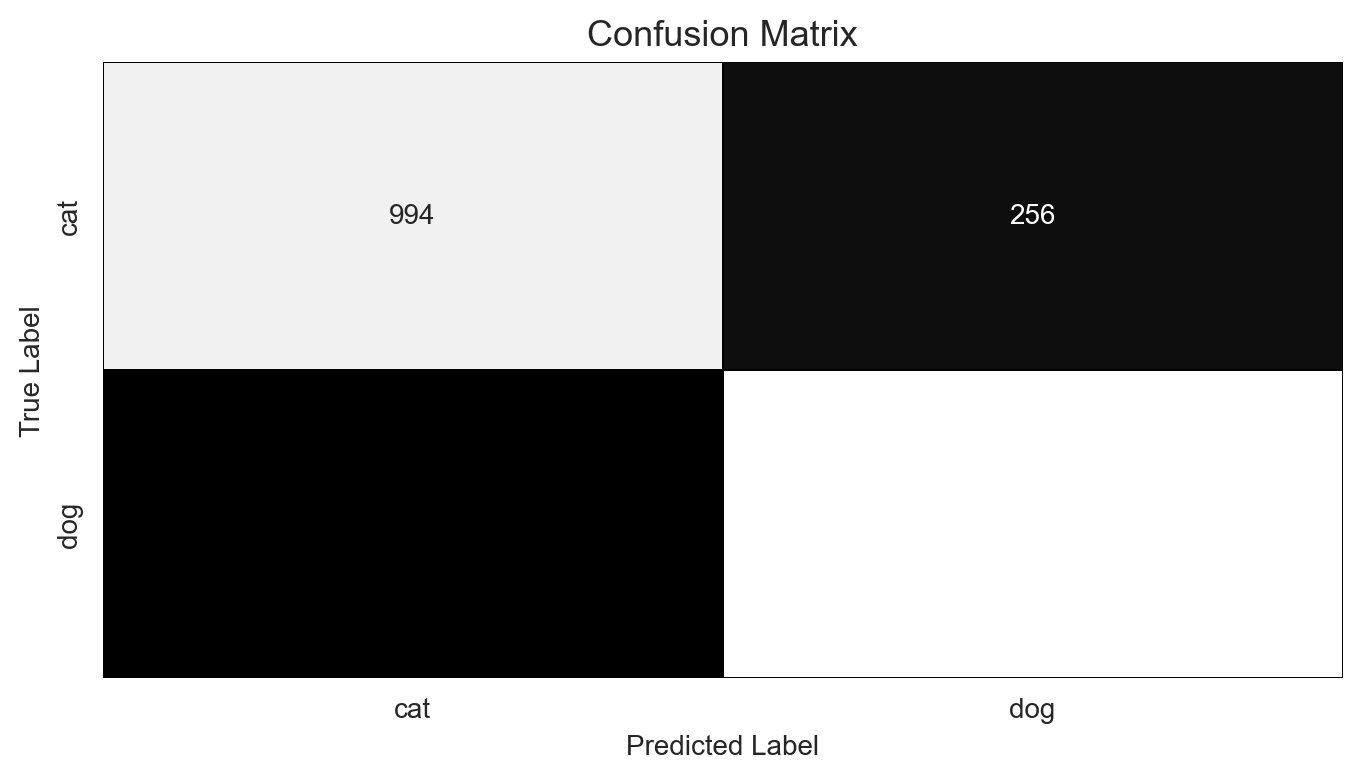

In [8]:
# Confusion Matrix

confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()